# Table of contents

# 5 <a href="#">Regression Problem</a>
>5.1 <a href="#example">Real world example</a><br>
>5.2 <a href="#things">Things to know</a><br>
>5.3 <a href="#import-data">Gathering data</a><br>
>5.4 <a href="#data-insights">Getting insights from the data and visualisation</a><br>
>5.5 <a href="#preparation-preprocessing">Data preparation and preprocessing</a><br>
>5.6 <a href="#model-selection">Model Selection</a><br>
>5.7 <a href="#fine-tune">Fine tuning the model</a><br>

Let's start with '**Supervised Learning**'. We have come across what supervised learning is. These supervised learning algorithms always work with data that have '**labels**' (target variables).

Whenever there is a dataset which deals with 'classification' or 'regression' problem, we go with supervised learning. There are two kinds of problems when it comes to supervising learning.
- Regression
- Classification

In this chapter, we are going to deal with the "regression" kind of problem. We are going to use a real-time dataset known as "Housing prices in California".

To get real-time datasets we have a lot of open-source platforms where you can find numerous datasets. Some of my favourites are;

- Kaggle.com
- Wikipedia's list of machine learning datasets.
- Tensorflow datasets.

I have provided the dataset in the 'dataset' folder. Make sure you have kept it in your environment. The dataset name is 'housing.csv'.

Let's get started!

## <a id="example" name="example">5.1 Real World Example</a>

The task at hand is to build a machine-learning model that can predict **median housing prices** in different districts using data from the California census. Important indicators like *population*, *median* *income*, and *median* *home* *price* define each district.

The goal is to create a predictive model that, using the features supplied, can accurately estimate housing prices and generalize well to unseen data.


Because the goal of this machine learning task is to predict a **continuous variable** (*the median housing price*), it is framed as a regression problem. **Metrics** like **Mean Squared Error (MSE)** or **Mean Absolute Error (MAE)**, *which concentrate on the model's capacity to produce accurate predictions on novel*, unseen data, will probably be used to assess the model's performance.


Don't get feared about MSE and MAE. You'll soon know why we are using it and where. Before we start coding let's learn a few more things, since we are dealing with a large amount of data we need to follow a pattern of steps to do our task.

## <a id="things" name="things">5.2 Thing to know</a>

### **Pipelines**

Sequential data processing elements that are essential for managing large amounts of data and transformations are known as **data pipelines** in machine learning. Its self-contained components and asynchronous operation make it easier to understand the system, allowing different teams to concentrate on different tasks. Because of this architecture's resilience, the system can continue to function even in the event of a temporary failure of one of its downstream components.

The below figure depicts the data pipeline in machine learning.

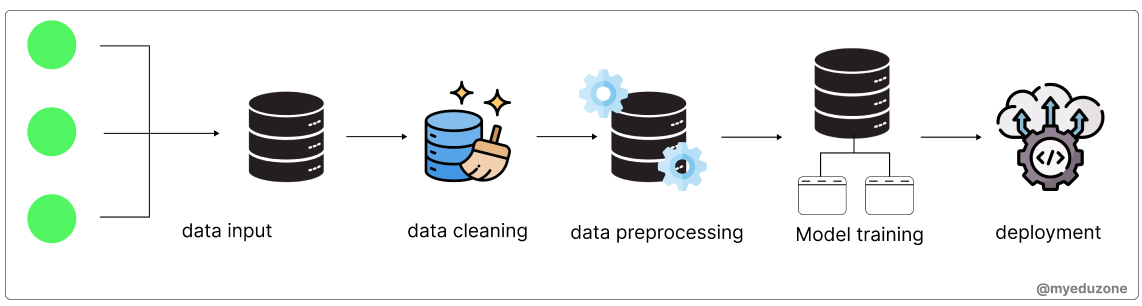

Our 'California House price prediction' problem is a "**multiple regression**". Because we are using multiple features to predict a value. And also, it is a "**multivariate regression**" since we are only predicting one value which is the "median house price".

### **Performance Measure**

We now came to know what is our main objective to find in the dataset. Sometimes based on the requirements, we need to gather data. Now it's time to select the "performance measure".

We use performance measures to check the error difference between the actual value and the predicted value.

For most of the regression problems, we use "***Root Mean Squared Error (RMSE) or MSE***". This will tell us how much error is typically made by the model compared with the actual value.

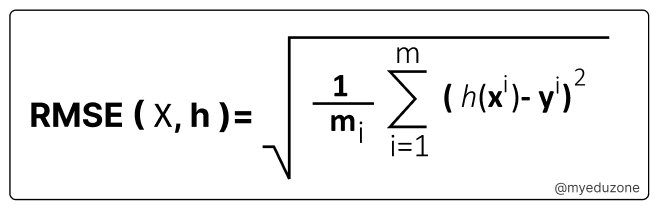

Where;

- m = no of instances
- x = Features or input variables
- h = hypothesis ( this is a method made by the model. the unseen inputs are given to this hypothesis only and the outputs are predicted through this model.)
- h(x) = predicted output
- y = actual target variable.

Sometimes, we may use **MAE** ( *Mean Absolute Error*) as a performance measure to check the distance between the vectors or features.

The selection of performance measures varies based on the programmer's choice or the problem they are dealing with.

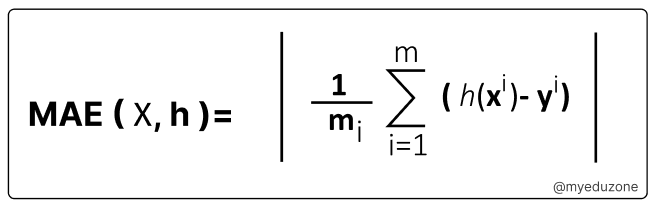

It is important to like to know the formula just to know how things work in the backend. While writing the code we don't use formulas instead we use predefined methods.

Let's get started with coding. Before the load the dataset into your environment.

## <a id="import-data" name="import-data">5.3 Gathering data</a>

### **import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **load data**

In [ ]:
housing_data = pd.read_csv('housing.csv')
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


There you go! Our real-time data is here.

## <a id="data-insights" name="data-insights">5.4 Getting insights from data and data visualizations</a>

In [ ]:
# getting information about the dataset.

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# shape of the dataset.

housing_data.shape

(20640, 10)

There are 20,640 rows with 10 columns. You can see the information provided in the previous cell. However the feature variable "total_bedrooms" has only 20,433 values. Some are missing.

All attributes in the dataset are float type only except "ocean_proximity". It is an object type.

Let's check the values in it.

In [ ]:
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

The **`value_counts()`** method is used in pandas to count unique values in a DataFrame or Series, presenting results in frequency order.

Let's look at the summary of our dataset.

In [ ]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In the above code, use see like 25%, 50%, 75%. This means these indicate the percentile of a particular value.

For example, the attribute "longitude" has 25% of rows with -121.35 as a value.

### **visualization of Numerical data**

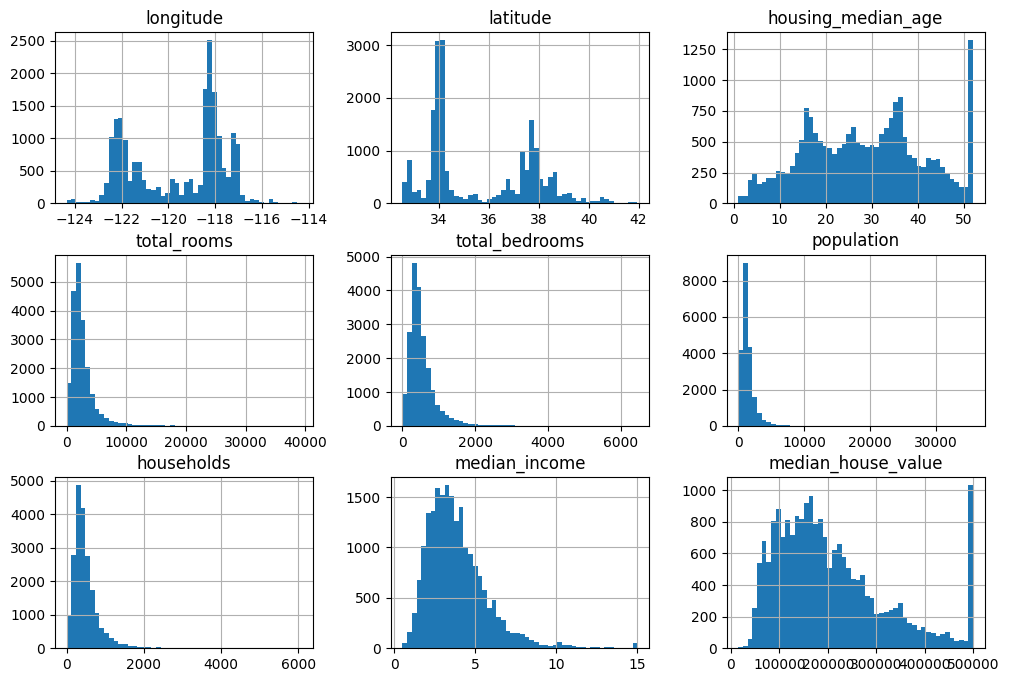

In [ ]:
#plotting histograms

housing_data.hist(bins=50,figsize=(12,8))
plt.show()

From the plots, the discovery that the attribute of *median income* has experienced **scaling** and **capping**, with values denoting tens of thousands of dollars, demands a thorough comprehension of the data computation procedure. Comparably, the capping of housing-related attributes such as median house value and median age of occupants raises serious concerns about potential limitations in machine learning algorithms' ability to learn, especially when the latter is the target attribute.

**scaling**
> refers to bringing attribute numerical values within a comparable range. This keeps attributes with higher magnitudes from controlling the learning process and guarantees that each feature contributes proportionately to the model.

**capping**
> Capping involves setting upper and lower limits on the values of specific attributes.


Also you can clearly see the skewness in the plots.
The recognition of different attribute scales highlights how critical it is to deal with this problem using feature scaling techniques—a subject that will be covered in later chapters.

An additional layer of complexity is introduced by the observation of right-skewed histograms, indicating a potential difficulty for machine learning algorithms in pattern detection.

In order to address this worry, attribute transformation will soon be explored in an effort to produce more bell-shaped and symmetric distributions.

A thorough grasp of client requirements, **feature scaling** and **transformation**, and **data preprocessing** will be essential for navigating these complexities and creating a reliable and accurate predictive model for housing prices in California districts.


## <a id="preparation-preprocessing" name="preparation-preprocessing" >5.5 Data Preparation and preprocessing</a>

It's time to prepare the data well. So our first step after getting data is to split the data into "*train*" and "*test*" sets. We can split the data manually by writing long lines of code. To make simple we use predefined method from a library called "sci-kit learn".

Sci-kit Learn is the most popular library used for model selection and all. It offers tools for data analysis, modeling, and predictive modeling with simplicity and efficiency.

Before that we need to install it using **`pip`** command.

In [ ]:
!pip install scikit-learn

### splitting data

In [ ]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(housing_data,test_size=0.2, random_state=42)

**`sklearn.model_selection`** library has **`train_test_split`** method that allows us to split the train and test set based on the **`test_size`** we give.

We gave **`test_size = 0.2`** which means 80% of the data we have given for training only. The remaining 20% is allocated for test set. Also we have give **`random_state=42`**.By producing the same random sequence every time, setting **`random_state = 42`** guarantees reproducibility in machine learning experiments, facilitating model comparison and consistent results.


So far everything is good. Our dataset is large enough for preprocessing the data. What if the dataset is small and could lead to bias?

In that case, we wish to have some extra attributes, right? Here comes the concept called "**stratified sampling**".  Using a stratified sampling strategy we can divide the data into homogenous subgroups which are called "strata".

Take our dataset, to predict the median house price for a given instance (set of features or attributes) one more related attribute is "median income" of the person. We can create a stratified sampeling for this attribute since the currency is up to range 6 only.

Let's create some stratified sampling for this.

In [ ]:
housing_data['income_cat'] = pd.cut(
                                    housing_data['median_income'],
                                    bins = [0.,1.5,3.0,4.5,6.0,np.inf],
                                    labels = [1,2,3,4,5]
                                    )

We have created a new attribute called "income_cat" using **`pandas.cut()`**. This method takes the dataset with the attribute name that we wanted stratified sampling, **`bins`** value, and the labels.

Let's plot the graph for this attribute.

Text(0, 0.5, 'No of districts')

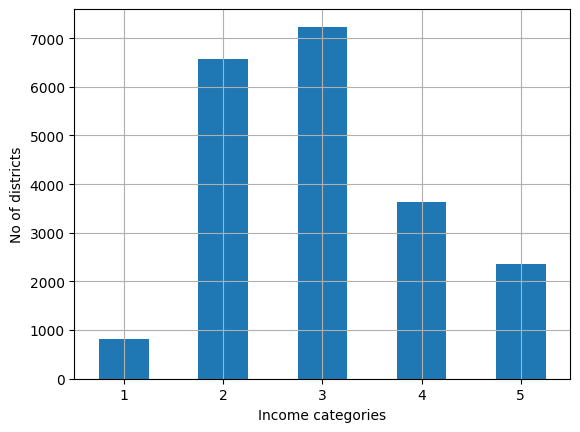

In [ ]:
housing_data['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Income categories')
plt.ylabel('No of districts')

We have plotted a bar graph using the housing['income_cat'] attribute after sorting the labels that we have given earlier.

Using this "income_cat" attribute we'll perform stratified shuffling. Let's write the code for this.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits = 10, test_size=0.2, random_state=42)
strata_splits = []

for train_index,test_index in splitter.split(housing_data,housing_data['income_cat']):
  strata_train_set_n = housing_data.iloc[train_index]
  strata_test_set_n = housing_data.iloc[test_index]
  strata_splits.append([strata_train_set_n,strata_test_set_n])


### splitting based on stratified sampling

In [ ]:
strat_train_set,strat_test_set = train_test_split(housing_data, test_size=0.2, stratify=housing_data['income_cat'], random_state=42)

In [ ]:
strat_train_set.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3


Now let's drop the "income_cat" column.

In [ ]:
for set_ in (strat_train_set,strat_test_set):
  set_.drop("income_cat",axis=1,inplace=True)

In [ ]:
strat_train_set.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND


Let's do some visualizations.

In [ ]:
housing_data = strat_train_set.copy()

Let's plot a scatter plot that resembles the map of California.

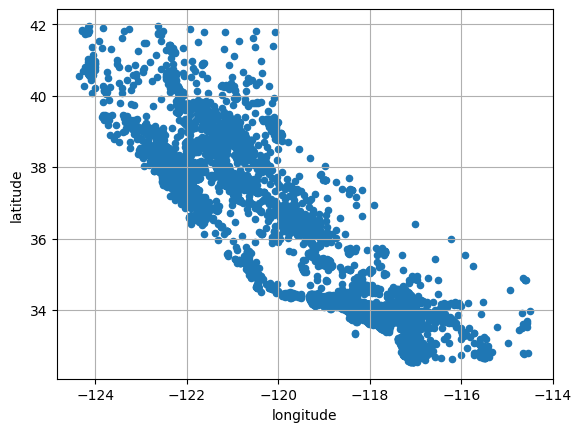

In [ ]:
housing_data.plot(kind='scatter',x="longitude",y='latitude',grid=True)
plt.show()

The graphs look good. But I want to know which area is more denser. To know which regions have a lot of demand.

Let's do that with the help of **`alpha`** argument.

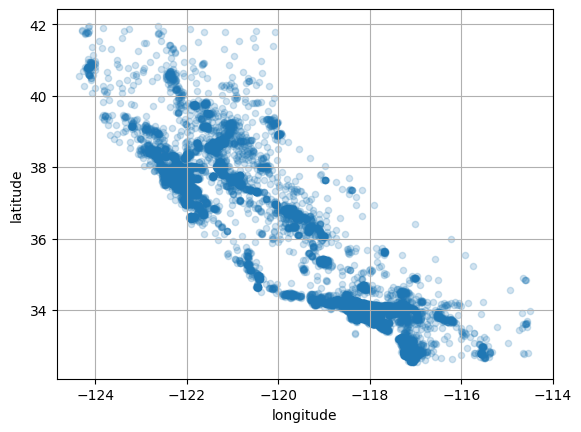

In [ ]:
housing_data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.2,grid=True)
plt.show()

Now you can check the difference. You can get some insights after looking at the graph. Like which region is more denser and which is less.

Let's look at another visualization where we can see the population and the house price.

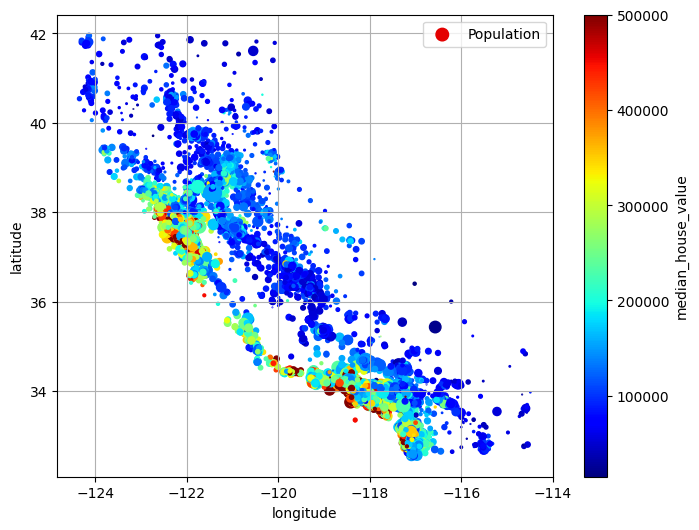

In [ ]:
housing_data.plot(kind='scatter',x='longitude',y='latitude',grid=True,
                  s=housing_data['population']/100,label='Population',
                  c='median_house_value',cmap='jet',colorbar=True,
                  legend=True, sharex=False, figsize=(8,6)
                  )
plt.show()

From the code the radius **`s`** represents the size of the population and the color represents the price of the houses which is **`c`**. Using **`cmap`** we have set the color bar which ranges from a low value(blue color) to a high value (red) by keeping the value to 'jet'.

Therefore, from the image we can conclude that the housing prices are very much related to the population and the location.

### Finding Co-relations

Let's find out which attributes are very closely related to the attribute "median_house_value". We can find the correlation using the **`corr()`** method.

In [ ]:
correlation_matrix = housing_data.corr()


<ipython-input-100-926ee3ef8461>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = housing_data.corr()


In [ ]:
correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

We have obtained the correlation coefficients using the **`corr()`** method. And they range from -1 to 1. If the coefficient is 1 then the attribute has a very strong correlation If the coefficient is close to -1 then the correlation is not that much strong.

We can also find the correlation using **`scatter_matrix`** of pandas.

Let's plot this for certain numerical attributes.

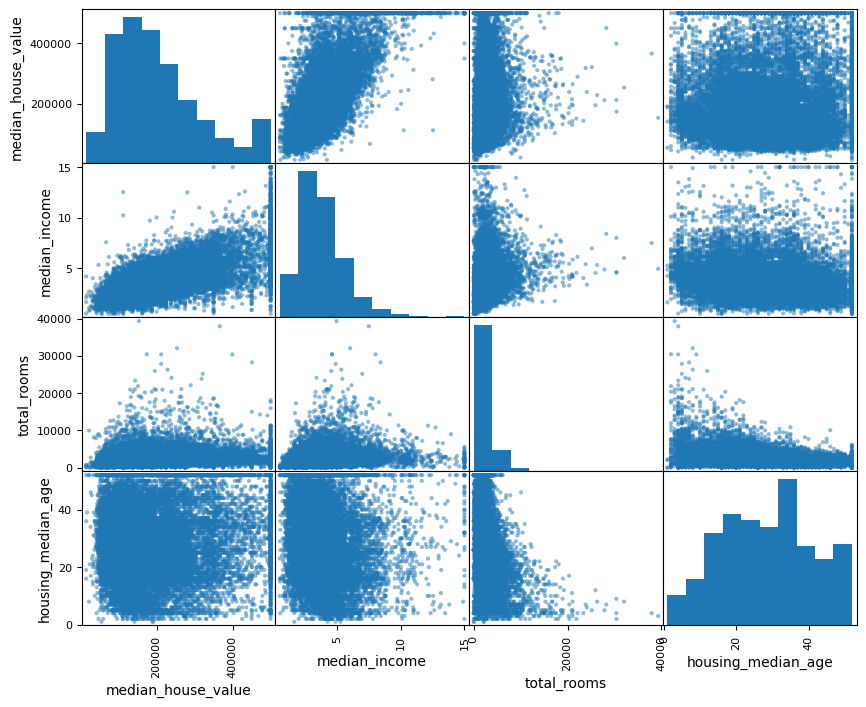

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value','median_income','total_rooms','housing_median_age']

scatter_matrix(housing_data[attributes],figsize=(10,8))
plt.show()

It seems like the attribute "median_income" is very strongly correlated to the median house value. Let's plot a figure for this.

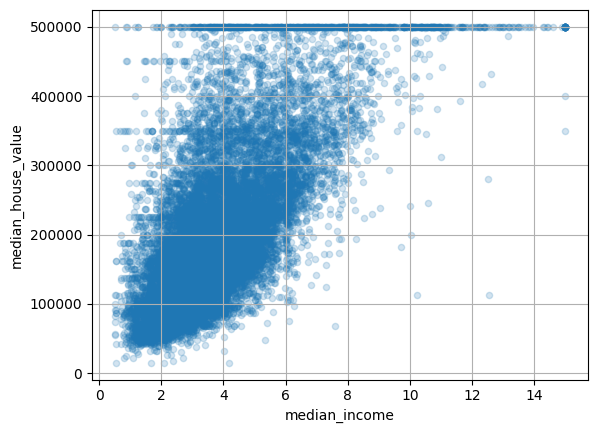

In [ ]:
housing_data.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.2, grid=True)
plt.show()

From the graph we can conclude that, there is a strong correlation between median income and median house value. Also, earlier we have discussed that the prices are capped. You can clearly observe them in the plot itself. You can see a horizontal line at 500000 value and some at 450000 and 350000. These are something like data quirks. We don't want our model to learn from these. We have to remove these things.

Its time to clean and preprocess the data.

### Data cleaning and preprocessing

First we'll separate the data with labels and without labels.

In [ ]:
housing = housing_data.drop('median_house_value',axis=1) # there is no inplace=True, which will make the changes permanent
housing_labels = housing_data['median_house_value'].copy()

Now we'll deal with missing values. We have an attribute 'total_bedrooms' with some missing values. In previous chapters, we have covered how to deal with these missing values. Like;

- dropping the column or rows
- filling the missing values using mean, median, or mode.

Here we'll use another method instead of the above one. Since we have discussed those let's try a new one.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

We need to fill in the missing values using the 'median' strategy. For that we have introduced a new class from the sci-kit learn that is **`SimpleImputer`**.

But we have one object attribute that is 'ocean proximity'. So, we'll separate the numerical values.

In [ ]:
housing_num = housing.select_dtypes(include=[np.number])

using the above line of code we have only selected those attributes that are numerical.

Let's fit those numerical values using the imputer.

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

There you see. The imputer has computed the median value for every attribute and replaced the missing values with the median value.

Let's check out these median values it has computed for each attribute.

In [ ]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

Using **`imputer.statistics_`** we can know the median values it has computed. Now let's check this with the actual median values that we have seen while using the **` describe()`** method.

In [ ]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

They are very quite similar to the values computed by the imputer and the actual values.

Let's transform these values into the actual values to replace the missing values.

In [ ]:
x= imputer.transform(housing_num)

### Design principles of Sci-kit learn.

We have seamlessly used **`fit()`** and **`transform()`** and also statistics and all, but what's the actual need for them?

Let's look into the design principles of the sci-kit learn library.

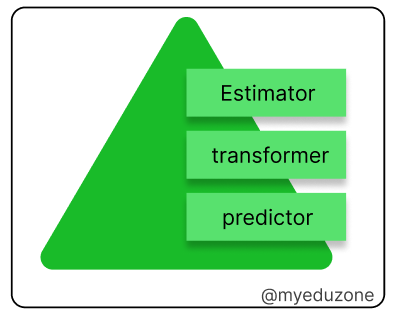

- **Estimator**
> Estimator is an object that can estimate some parameters from the given dataset. The **`SimpleImputer()`** that we have used is an estimator. Using the **`fit()`** method we were able to estimate the parameters.

- **Transformer**
> After estimating the values we can transform them into the dataset to replace the missing values. We can perform this using the **`transformer()`** method that returns the transformed dataset. Also we have **`fit_transform()`** which does both fit and transform.

- **Predictor**
> After performing fit and transform the only thing we are left with is predicting. We can predict using the **`predict()`** method.

Finally, we filled in the missing places using SimpleImputer and then transformed the data.

But most of the time the **`transform()`** method returns a Numpy array which is nothing but a sparse matrix (matrix with the most number of zero values).

This matrix neither has column names nor indexes. Let's make the transformed dataset by giving column names and indexes.

In [ ]:
housing_tr= pd.DataFrame(x,columns=housing_num.columns,index=housing_num.index)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


Now you can see there are no missing values in the split dataset.

### Categorical and text attributes

So far we have worked with only numerical type data. Now let's work on categorical variable.

We have only one categorical variable that is 'ocean proximity'. let's separate them.

In [ ]:
housing_cat = housing[['ocean_proximity']] # separating categorical variable.
housing_cat.head(5)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN


So our process is to encode the categorical values to numerical states. For this we use either **`OrdinalEncoder()`** or **`OneHotEncoder()`**.Let's look at them.


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

o_encoder = OrdinalEncoder()
housing_cat_encoded = o_encoder.fit_transform(housing_cat)

**`sklearn.preprocessing`** provides **`OrdinalEncoder()`** that converts text to numbers.

In [ ]:
housing_cat_encoded[:5]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.]])

Let's check what are the categories that are made by the encoder.

In [ ]:
o_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

It draws attention to a prominent problem in machine learning where algorithms may misinterpret the proximity between adjacent categorical values. This difficulty is especially noticeable in non-ordinal categories where the inherent order is meaningless, such as the "ocean_proximity" column. One-hot encoding is a commonly recommended remedy to get around this. Using this method, each category will have binary attributes, with one being designated as "hot" (equal to 1) and the others remaining "cold" (equal to 0). Using Scikit-Learn's **`OneHotEncoder`** class to transform categorical values into one-hot vectors, this method—also referred to as dummy encoding—ensures that discrete categories are accurately represented.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

h_encoder = OneHotEncoder()
housing_cat_h_encoded = h_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_h_encoded.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

Since OneHotEncoder returns a sparse matrix instead of a Numpy array we have displayed the values in the form of an array.

In [ ]:
h_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## <a id="model-selection" name="model-selection">5.6 Model Selection</a>

Before choosing the models we have another task in our hand. That is *'feature scaling'*.

Sometimes the values in the data are not scaled properly. The values are not defined in a proper range. This leads to bias in the data. And the machine learning models will not perform well when the features are not scaled properly.

The values inthe dataset should be scaled. This makes the model perform well. We have two ways to perform feature scaling;

- min-max scaling
- standardization

Let's discuss both of them.

### min-max scaling

It is also called ***normalization***. This is the simplest way to perform feature scaling. min-max scaling shifts and rescales the values between the range 0 to 1.

Let's perform min-max scaling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_mm_scaled = mm_scaler.fit_transform(housing_num)
housing_num_mm_scaled

array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]])

### Standardization

Let's do Standardization which does the same but differs in the process.

In [ ]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
housing_num_s_scaled = s_scaler.fit_transform(housing_num)
housing_num_s_scaled

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

You can see a lot of differences between the scaled values of both strategies. For **`MinMaxScaler()`** we are specifying range and for **`StandardScaler()`** we won't specify any range.

Standardization and min-max scaling will condense most values into a narrow range.


So far we have performed a few transformations separately. First, we have performed on numerical data and then on categorical data.

Now we need to execute them through a pipeline in the right order.Let's do that.

In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([

                         ('imputer',SimpleImputer(strategy='median')),
                         ('standardize',StandardScaler())
])

**`sklearn.pipeline`** provides **`Pipeline`** constructor to execute the transforms in the right order through a pipeline.

We have created a pipeline for numerical attributes only.

In [ ]:
import sklearn

sklearn.set_config(display="diagram")
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

using **`sklearn.set_config(display="diagram")`** we can visualize the pipelines. You can see the numerical pipelines above.

If you don't want to name the transformers like "imputer" and "standardize", you can create a pipeline without them using **`make_pipeline()`** from **`sklearn.pipeline.`**

In [ ]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),StandardScaler())

In [ ]:
sklearn.set_config(display="diagram")
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

You get the same pipeline visualization if you do in any of the methods like by using **`Pipeline`** or **`make_pipeline()`**.

If you carefully observe that the last one we passed to **`Pipeline`** is a transformer.

So, for this, the estimator is a transformer, the pipeline at the end will act as a transformer too. We can use the pipeline's **`fit_transform()`** method to transform the data.

If the last estimator passed to the Pipeline is a predictor then the pipeline will act as a predictor and will have **`predict()`** method.

Let's transform the data using the pipeline we have created.

In [ ]:
# transforming the data using the pipeline

housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

Let's do a pipeline for categorical attributes.

In [ ]:
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown="ignore"))

We have also created a pipeline for categorical data using **`make_pipeline()`**. We have passed the **`SimpleImputer`** with **`strategy="most_frequent"`**, which will replace the missing values with the most frequent values. Then we provided with **`OneHotEncoder`**

So far we have created pipelines and transformed data separately. Let's combine both the pipelines( numerical and categorical) using **`ColumnTransformer`** from **`sklearn.compose`**.

In [ ]:
from sklearn.compose import ColumnTransformer

#write down all numerical attributes
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
"total_bedrooms", "population", "households", "median_income"]

#write down all categorical attributes

cat_attribs = ["ocean_proximity"]

preprocessing = ColumnTransformer([

                                   ('num',num_pipeline,num_attribs),
                                   ('cat',cat_pipeline,cat_attribs)
])

We have passed a list of tuples to the **`ColumnTransformer()`** to complete preprocessing for both numerical and categorical values.

**NOTE**: In earlier sections we discussed that **`OneHotEncoder`** returns a sparse matrix and then **`num_pipeline`** will return a dense matrix. So, here we got the combination of both sparse and dense matrix. In this case, the ColumnTransformer will estimate the density of the both matrix and returns the final matrix. In our case, the **`ColumnTransformer`** will return a dense matrix. The final matrix should have more non-zero elements.

Finally, we have created a single pipeline and let's see what it will do.

- Missing values in the dataset for numerical attributes are replaced with the median value and for the categorical attributes, the missing values are replaced with the most frequent value.

- Categorical values are converted to numerical format using encoding.


### Selecting Model

Finally, we have done all the necessary cleaning and preprocessing of the data. Now it's time to choose the model and then fine-tune it. Let's try out a few algorithms.

But we'll discuss these algorithms in depth in the coming chapters. Let's see how to train the models.

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

#creating object for the model using make_pipeline()
lin_reg = make_pipeline(preprocessing,LinearRegression())
            #features  #target variables
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

Superrr! We have created a linear regression model.

Now, let's make some predictions about the training set.

In [ ]:
#predictions using training set
housing_predictions = lin_reg.predict(housing)
housing_predictions[:4].round(2)

array([270886.93, 334830.61, 119856.18, 109210.93])

Good. It has predicted the values means the median house prices. Let's check the error made by the model using RMSE.

In [ ]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels,housing_predictions, squared=False)
lin_rmse

68232.83515124217

That's the error value. Given that most districts' median housing values fall between 120,000  and 265,000, a typical prediction error of $68,232 is rather unsatisfactory.

This is the result of *underfitting*. You can see the value is very less compared to the range.

This tells us that the Linear Regression model is not a good fit for our data. We need to try some complex models.


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#creating object for the decision tree regressor.
tree_reg = make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing,housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

There you go. We have created a tree regressor using DecisionTrees.

In [ ]:
# predicting values using training set
housing_predictions = tree_reg.predict(housing)
housing_predictions

array([458300., 483800., 101700., ..., 148800., 500001., 233300.])

The model has predicted the values. Now let's check the mean squared error.

In [ ]:
tree_rmse = mean_squared_error(housing_labels,housing_predictions,squared=False)
tree_rmse

0.0

Wow! There is no mean squared error. It's completely 0. Will this model be that much perfect? You can clearly say that the model has badly overfitted the data.

To check whether the model is perfect or not let's do some cross-validation.

### Cross validation

To evaluate the decision tree we can again split the training data into smaller sets and also to validation set. Thereafter, we need to validate the smaller training sets with the validation set.

This task is a hectic one. But we can do this using one simple method called **`cross_val_score()`**.

In [ ]:
from sklearn.model_selection import cross_val_score

tree_mse = -cross_val_score(tree_reg,housing,housing_labels,scoring='neg_root_mean_squared_error',cv=10)
tree_mse

array([69032.65226236, 67396.03872093, 67331.17750346, 70137.91696307,
       68274.93115806, 71446.43663424, 70628.43538691, 69457.94060134,
       67138.7823784 , 66941.10011402])

**`sklearn.model_selection provides cross_val_score()`** that allows us to cross-validate the training set based on the folds (taken 10 in our code) we have given.

You can see that **`scoring="neg_root_mean_squared_error"`** which means we are validating based on the RMSE. But this expects a utility function that will return negative values. So, we use the (-) sign to switch the signs.

In [ ]:
pd.Series(tree_mse).describe()

count       10.000000
mean     68778.541172
std       1606.882060
min      66941.100114
25%      67347.392808
50%      68653.791710
75%      69967.922873
max      71446.436634
dtype: float64

You can check that 75% are of $69,967. This means the model is not perfect my friend.

Let's once check for Linear regression.

In [ ]:
lin_mse = -cross_val_score(lin_reg,housing,housing_labels,scoring="neg_root_mean_squared_error",cv=10)
pd.Series(lin_mse).describe()

count       10.000000
mean     68316.200932
std       1024.094868
min      67256.049270
25%      67453.023761
50%      68046.527908
75%      68959.982057
max      69952.430271
dtype: float64

You can compare the values of both linear regression and decision regression.

We'll try one last model, that is RandomForest.

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing,RandomForestRegressor(random_state=42))

forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     48920.517843
std        715.207292
min      47479.120613
25%      48492.372660
50%      49001.090516
75%      49386.763452
max      49998.347019
dtype: float64

This random forest model works very well compared to Linear regression and the Decision tree.

Let's select the model and fine-tune it.

## <a id="fine-tune" name="fine-tune">5.7 Fine tuning the model</a>

We have gone through Linear regression, decision tree regressor, and finally, we opted for Random forest regressor.

Now it's time to fine-tune this model.

First things first, let's quickly know what are hyperparameters.

Hyperparameters are the configuration variables that are used to improve the training model. To find the best hyperparameters, we need to work manually to find the best combination.

But we already have a few classes that make our work simple. The first one we are talking about is **`GridSearchCV`**.

**`GridSearchCV`** will find all possible hyperparameters combination by evaluating using cross-validation and gives the best combinations.

## Summary

- In this chapter, we have done a real-world end-to-end project.
- You got to know about how to deal with the regression kind of problem.
- Learned about;
>- pipeline
>- feature scaling

- Applied transformations on numerical and categorical data.
- Trained our data on;
>- Linear regression
>- Decision tree regressor
>- Random Forest regressor

- At last we have fine tuned our model.